# Churn Minimization
## Written by Leo Carrico

For this case, we will be looking at a financial company that keeps assists Users in keeping track of their financial accounts. Sadly, some Users have been cancelling their subscriptions.<br>
Our goal is by gathering the usage of the Users on the app, can we predict and find which features are most prominent in Users that cancel their subscription.

## Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/churn_data.csv")
data.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [17]:
print(f"Column Names: {data.columns}")
data.describe()

Column Names: Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')


,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [33]:
## Data Cleaning

In [19]:
data.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [20]:
data = data.dropna(subset=['age'])
data.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [26]:
data['rewards_earned'] = data['rewards_earned'].fillna(0)

In [27]:
data[['age', 'credit_score', 'rewards_earned']].isna().sum()

age                  0
credit_score      8027
rewards_earned       0
dtype: int64

In [30]:
data = data.drop(columns=['credit_score'])

In [31]:
data.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [65]:
data.dtypes

age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned             float64
reward_rate                float64
is_referred                  int64
dtype: object

In [35]:
response = data['churn']
data = data.drop(columns=['user', 'churn'])

## Data Visualization

In [60]:
base_features = data.copy().drop(columns=['housing','payment_type','zodiac_sign'])

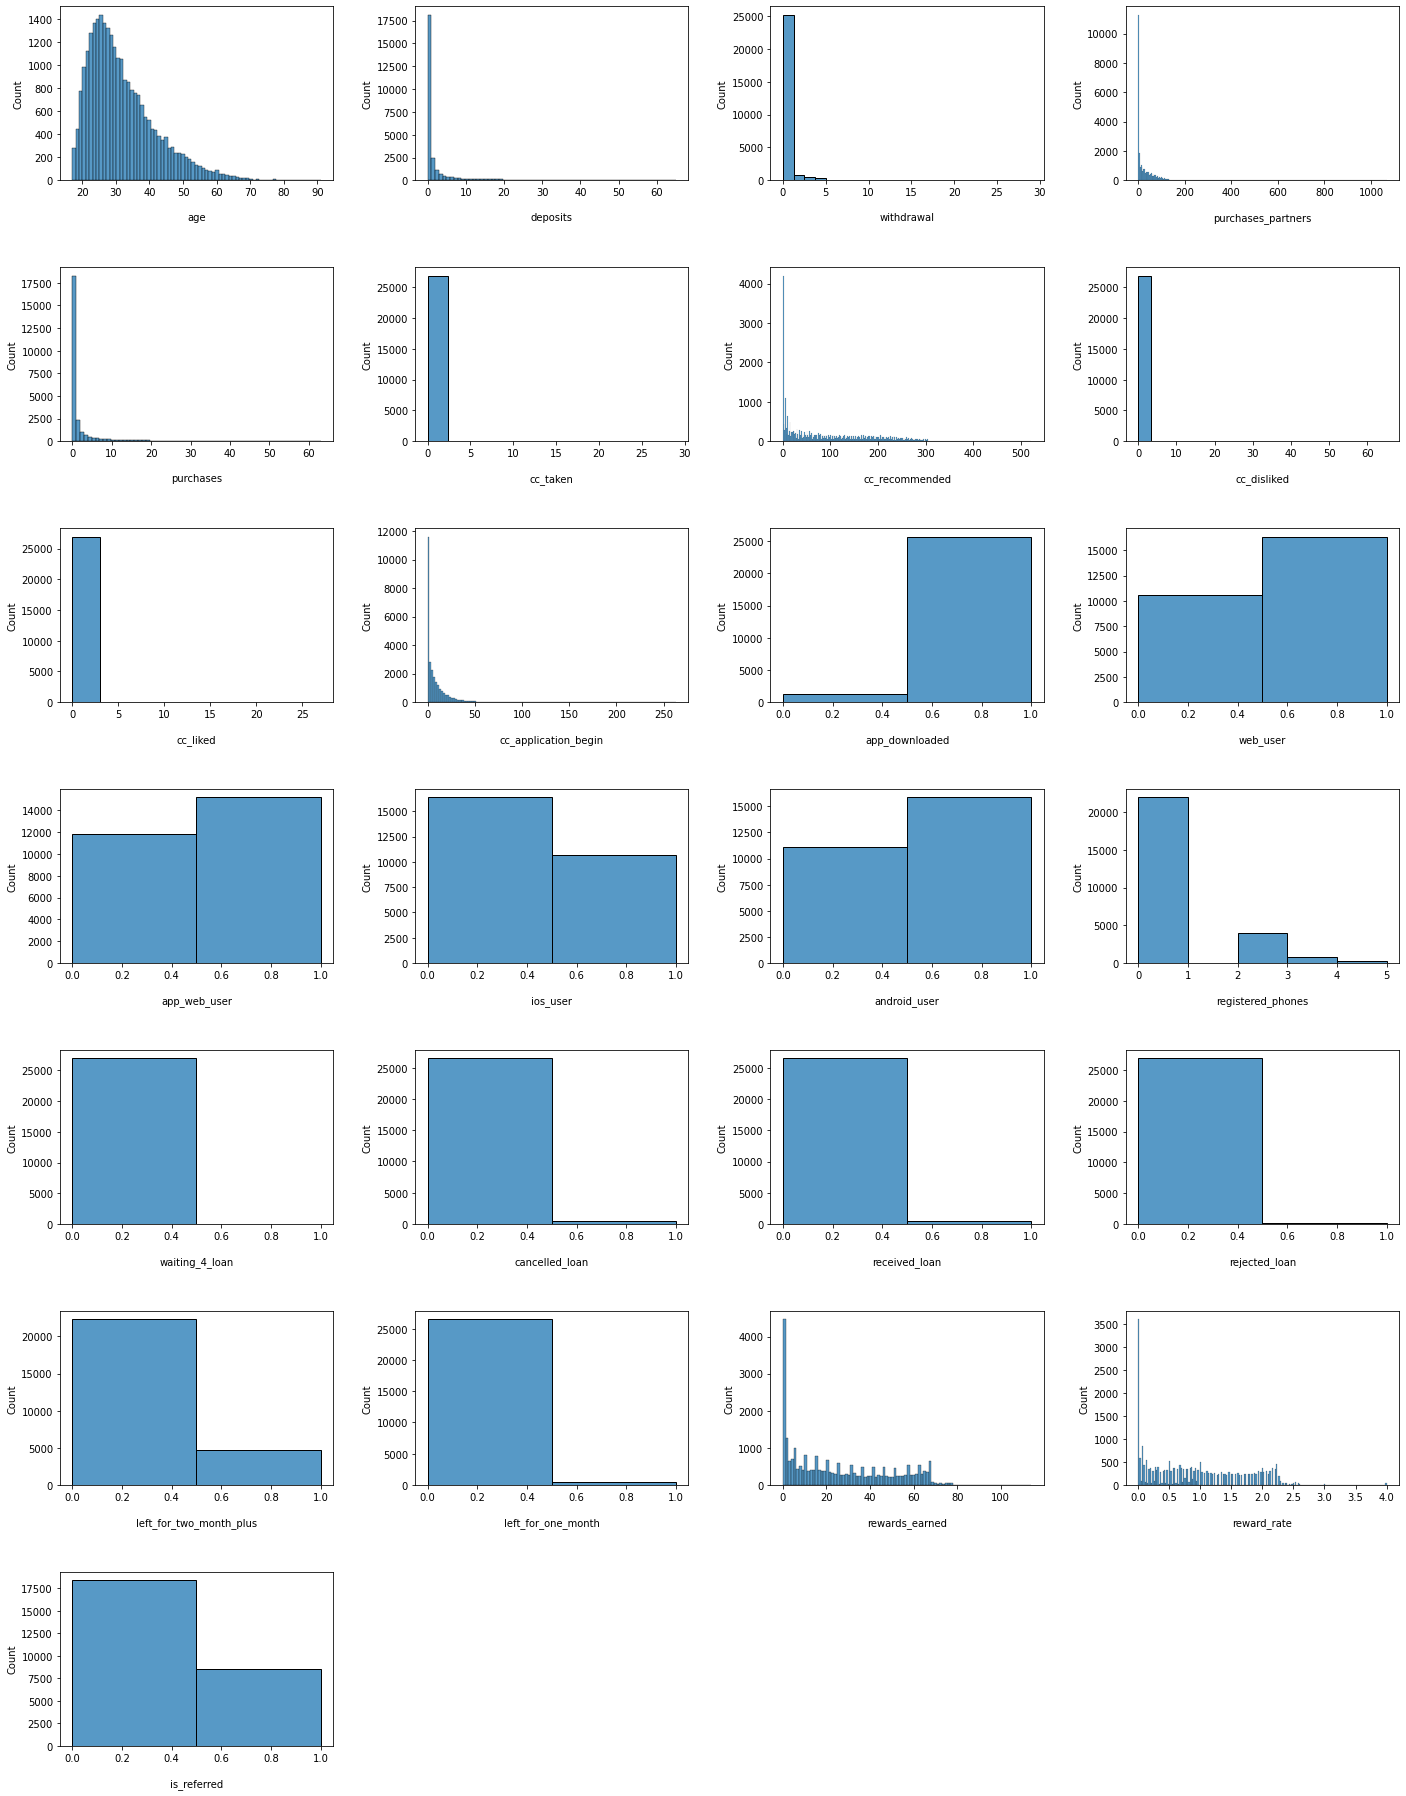

In [61]:
n = len(base_features.columns)
cols = 4
rows = round(n/cols + 0.5)

fig, ax = plt.subplots(rows, cols, figsize=(24,32))
for i in range(rows):
    for j in range(cols):
        curr = cols*i + j
        if curr >= n:
            ax[i, j].axis('off')
        else:
            ax[i,j].xaxis.labelpad = 15
            bins = len(data[base_features.columns[curr]].unique())
            sns.histplot(data=data, x=base_features.columns[curr], ax=ax[i, j], bins=bins)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [78]:
data[['housing','payment_type','zodiac_sign']].head(2)

,housing,payment_type,zodiac_sign
0,na,Bi-Weekly,Leo
1,R,Weekly,Leo


<AxesSubplot:xlabel='zodiac_sign', ylabel='Count'>

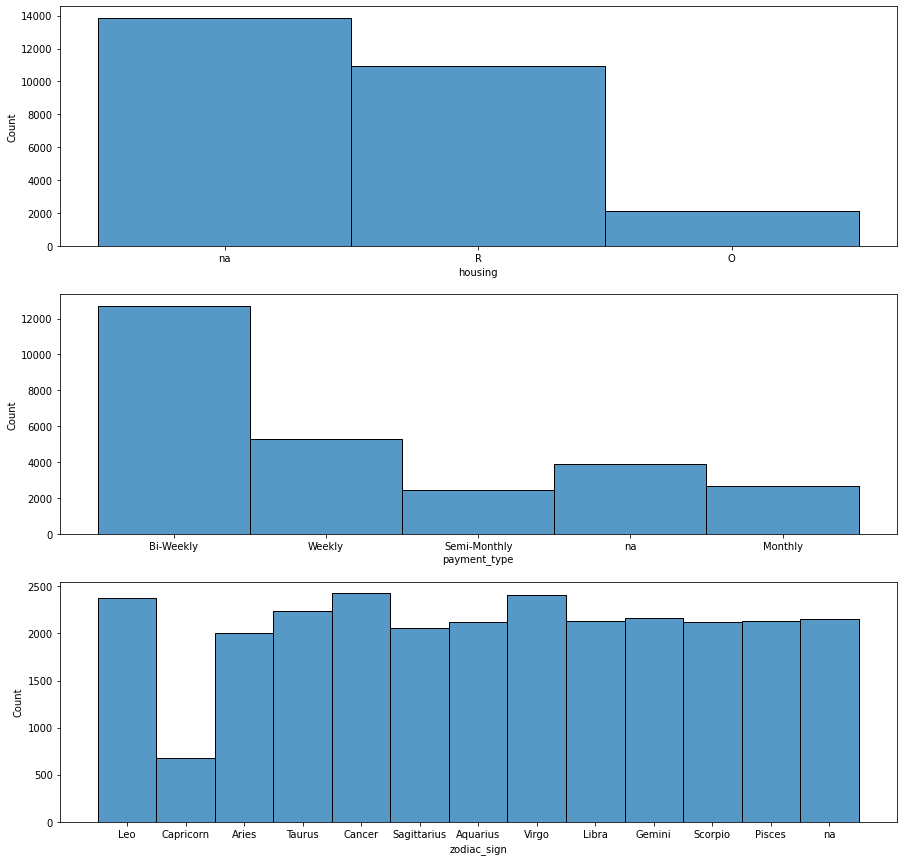

In [77]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))
sns.histplot(data=data, x='housing', ax=ax[0])
sns.histplot(data=data, x='payment_type', ax=ax[1])
sns.histplot(data=data, x='zodiac_sign', ax=ax[2])

In [84]:
data.dtypes

age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned             float64
reward_rate                float64
is_referred                  int64
dtype: object

<AxesSubplot:>

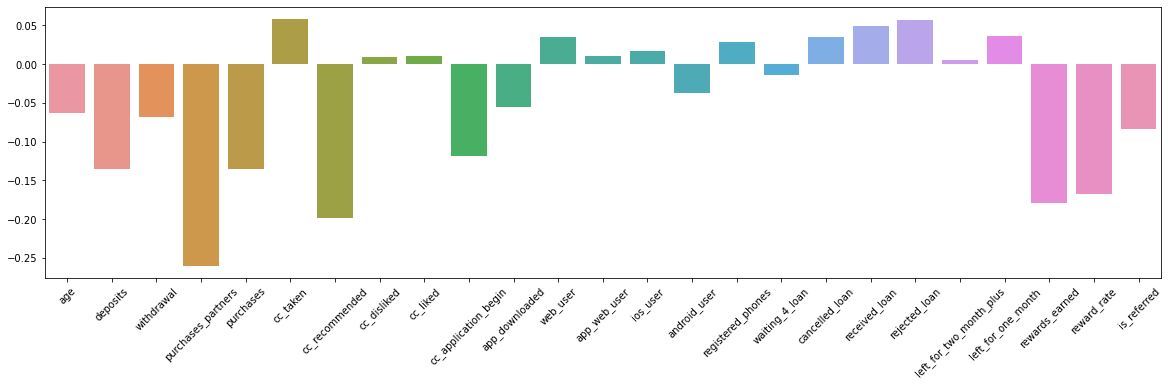

In [91]:
corrs = base_features.corrwith(response)
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x=corrs.index, y=corrs.values)

<AxesSubplot:>

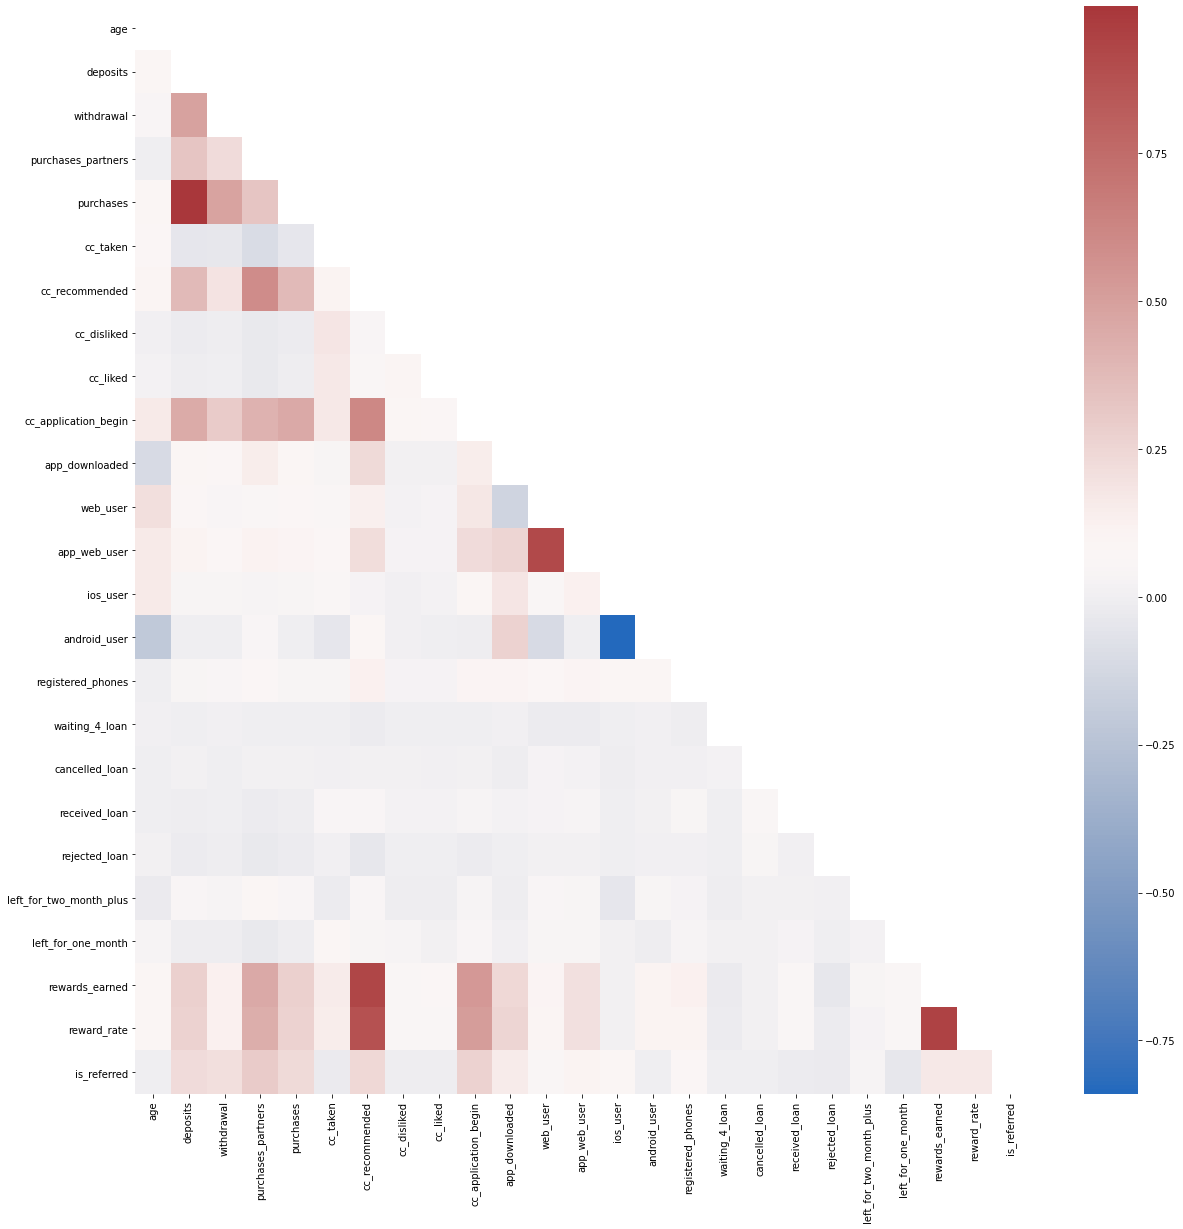

In [102]:
corrs_all = base_features.corr()
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(corrs_all, dtype=bool))
sns.heatmap(data=corrs_all, cmap="vlag", mask=mask)

## Feature Engineering

In [ ]:
data = data.drop(columns=['app_web_user'])

In [105]:
data.dtypes

age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned             float64
reward_rate                float64
is_referred                  int64
dtype: object

In [106]:
data = pd.get_dummies(data)
data.dtypes

age                          float64
deposits                       int64
withdrawal                     int64
purchases_partners             int64
purchases                      int64
cc_taken                       int64
cc_recommended                 int64
cc_disliked                    int64
cc_liked                       int64
cc_application_begin           int64
app_downloaded                 int64
web_user                       int64
ios_user                       int64
android_user                   int64
registered_phones              int64
waiting_4_loan                 int64
cancelled_loan                 int64
received_loan                  int64
rejected_loan                  int64
left_for_two_month_plus        int64
left_for_one_month             int64
rewards_earned               float64
reward_rate                  float64
is_referred                    int64
housing_O                      uint8
housing_R                      uint8
housing_na                     uint8
p

In [107]:
data = data.drop(columns=['housing_na', 'payment_type_na', 'zodiac_sign_na'])

In [108]:
data.dtypes

age                          float64
deposits                       int64
withdrawal                     int64
purchases_partners             int64
purchases                      int64
cc_taken                       int64
cc_recommended                 int64
cc_disliked                    int64
cc_liked                       int64
cc_application_begin           int64
app_downloaded                 int64
web_user                       int64
ios_user                       int64
android_user                   int64
registered_phones              int64
waiting_4_loan                 int64
cancelled_loan                 int64
received_loan                  int64
rejected_loan                  int64
left_for_two_month_plus        int64
left_for_one_month             int64
rewards_earned               float64
reward_rate                  float64
is_referred                    int64
housing_O                      uint8
housing_R                      uint8
payment_type_Bi-Weekly         uint8
p

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data, response, test_size=0.33, random_state=42)

In [114]:
y_train.value_counts()

0    10623
1     7464
Name: churn, dtype: int64

In [115]:
import random

In [116]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

In [117]:
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)

In [118]:
indexes = np.concatenate((lower,higher))
X_train = X_train.loc[indexes, :]
y_train = y_train.loc[indexes]

In [124]:
y_train.value_counts()


0    7464
1    7464
Name: churn, dtype: int64

In [126]:
assert y_train.value_counts().sum() == len(X_train)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [129]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating Our Model

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [159]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']},
]

gs = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)

In [160]:
gs = gs.fit(X_train_scaled, y_train)
gs.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}

In [161]:
clf = LogisticRegression(**gs.best_params_)

In [162]:
clf.fit(X_train_scaled, y_train)

LogisticRegression(C=0.03359818286283781, solver='liblinear')

In [163]:
y_pred = clf.predict(X_test_scaled)

In [164]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

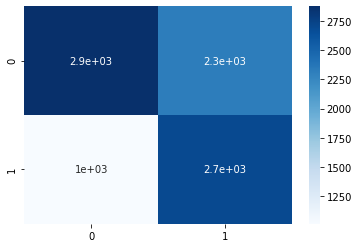

In [165]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, cmap="Blues", annot=True)

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63      5199
           1       0.54      0.73      0.62      3710

    accuracy                           0.63      8909
   macro avg       0.64      0.64      0.63      8909
weighted avg       0.65      0.63      0.63      8909



In [167]:
clf.coef_

array([[-1.61190852e-01,  2.29007990e-02,  5.73780536e-02,
        -7.11275150e-01, -1.64612828e-01,  9.01630954e-02,
         2.61688902e-01, -2.07184374e-02,  2.05918709e-02,
         3.22197819e-02, -5.22587402e-02,  1.26571075e-01,
         1.04879493e-01,  1.84022824e-02,  7.55988004e-02,
        -1.58129904e-02,  8.06755438e-02,  7.58456883e-02,
         1.07491687e-01,  7.48491287e-02,  4.23629509e-02,
        -3.89455970e-01,  1.31718577e-02,  4.62161342e-03,
        -2.75501873e-02,  7.75921464e-02, -1.67708362e-02,
        -1.34694504e-03,  1.33546044e-02,  7.97904121e-02,
        -4.26852497e-02,  2.18744954e-03,  2.19022154e-02,
         2.25046696e-02, -6.48619094e-04, -1.40985652e-03,
        -2.88853289e-02,  1.89250284e-02, -2.16270403e-02,
        -6.27099230e-03, -3.48149959e-02, -1.39722982e-02]])

In [169]:
coefs = pd.concat([pd.DataFrame(X_train.columns, columns=['features']), pd.DataFrame(np.transpose(clf.coef_), columns=["coef"])], axis=1)
coefs

,features,coef
0,age,-0.161191
1,deposits,0.022901
2,withdrawal,0.057378
3,purchases_partners,-0.711275
4,purchases,-0.164613
5,cc_taken,0.090163
6,cc_recommended,0.261689
7,cc_disliked,-0.020718
8,cc_liked,0.020592
9,cc_application_begin,0.032220


<AxesSubplot:xlabel='coef', ylabel='features'>

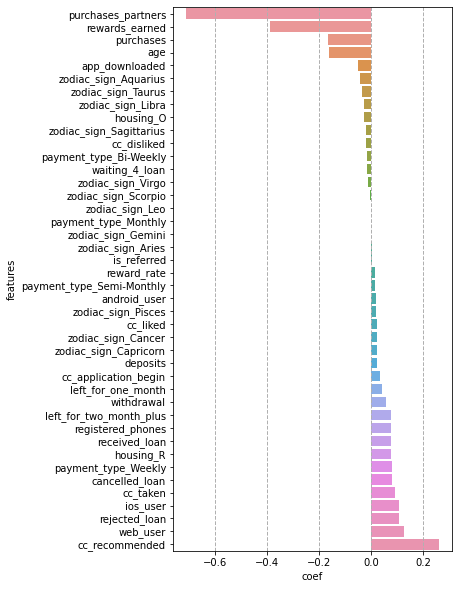

In [188]:
plt.figure(figsize=(5,10))
plt.grid(axis='x', linestyle='--', linewidth=1)
sns.barplot(data=coefs.sort_values(by="coef"), x='coef', y='features', orient = 'h')


## Conclusion
In conclusion, we can see that even though we only have a 63% accuracy, our feature importances can still be pulled for us to see which are highest impacting to our churn rate.<br>
From here, we can expand to see how they are affecting our customers or Users and adjust our softare or situation to reduce our churn rate.